<a href="https://colab.research.google.com/github/KGF2/DeepLearningAmateur/blob/GAN/GAN_02_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

In [6]:
# data

NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train  = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

x_train[54,12,13,1]

0.36862746

In [10]:
# architecture

input_layer = Input([32,32,3])

x = Flatten()(input_layer)

x = Dense(200, activation='relu')(x)
x = Dense(150, activation='relu')(x)

output_layer = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output_layer)

model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_8 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compiling the model

opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
# train the model

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 15s 304us/step - loss: 1.8444 - accuracy: 0.3355
Epoch 2/10
50000/50000 [==============================] - 15s 293us/step - loss: 1.6538 - accuracy: 0.4089
Epoch 3/10
50000/50000 [==============================] - 15s 292us/step - loss: 1.5773 - accuracy: 0.4367
Epoch 4/10
50000/50000 [==============================] - 15s 295us/step - loss: 1.5248 - accuracy: 0.4546
Epoch 5/10
50000/50000 [==============================] - 15s 292us/step - loss: 1.4846 - accuracy: 0.4706
Epoch 6/10
50000/50000 [==============================] - 15s 292us/step - loss: 1.4567 - accuracy: 0.4832
Epoch 7/10
50000/50000 [==============================] - 15s 303us/step - loss: 1.4271 - accuracy: 0.4898
Epoch 8/10
50000/50000 [==============================] - 15s 297us/step - loss: 1.4032 - accuracy: 0.5003
Epoch 9/10
50000/50000 [==============================] - 15s 295us/step - loss: 1.3826 - accuracy: 0.5074
Epoch 10/10
50000/50000 [============

In [22]:
# analysis / evaluate the test

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 62us/step


[1.4545783086776733, 0.47859999537467957]

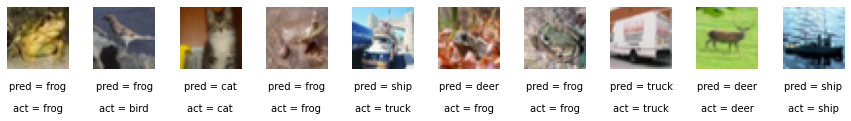

In [33]:
# viewing some predictions

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])


preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    # print(i, idx)
    ax.imshow(img)